Some times we can transform small numerical values of categories (1 to 3) into boolean one hot vector. e.g. to [0/1,0/1,0/1]

### Transformers
Instead of guessing the next word, we can also remove a word and guess what was the missing word. 

- _I : means that the token G in the beginning of a word
- ULMFit for long documents
- Large documents are challenging for transsformers
- Outliers should not be thrown away automatically. They should be investigated and maybe handled separately if they are not just noise. 
- Coorolation coefficient

**If there is _ at the end of method/function, it is IN PLACE operator**

## Ensembling

Training several models and combining their predictions

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import torch
from torch import tensor

In [2]:
# get high level info about the dataframe
# df.describe(include='object')

df= pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

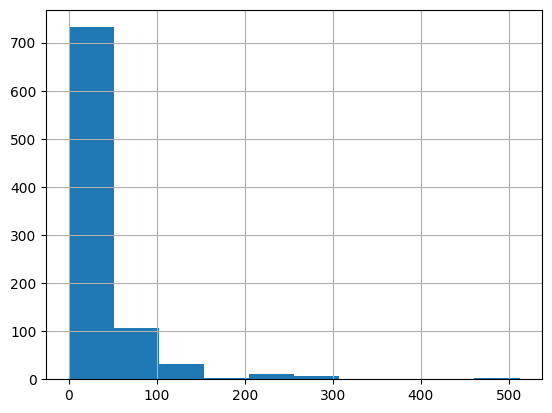

In [5]:
df['Fare'].hist()

## Use of log
Since it is long tail distribution. Linear model does not like this kind of distribution and therefore we use `log`. 
Log changes number like this: really big number less big, and small number not so much change

In [6]:
df['logFare'] = np.log(df['Fare']+1)

<Axes: >

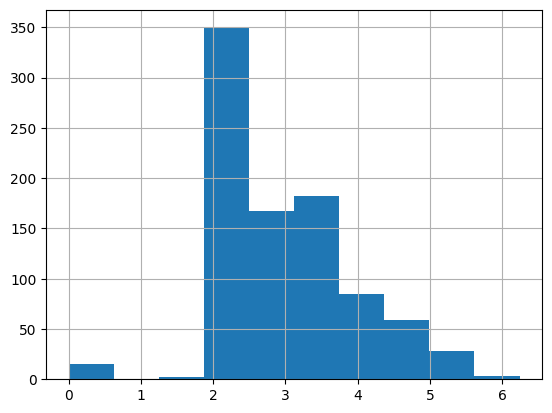

In [7]:
df['logFare'].hist()

In [8]:
df.describe(include=[object]) # non number columns

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Dummy variables

We can convert strings that are in categories (like 4 categories) into several 

In [9]:
df= pd.get_dummies(df, columns=["Sex", "Pclass", "Embarked"])
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'logFare', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [10]:
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,logFare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,2.110213,False,True,False,False,True,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,4.280593,True,False,True,False,False,True,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.188856,True,False,False,False,True,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,3.990834,True,False,True,False,False,False,False,True
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,2.202765,False,True,False,False,True,False,False,True


In [11]:
selected_cols = ["Sex_female", "Sex_male", "Pclass_1", "Pclass_2", "Pclass_3", "Embarked_C", "Embarked_Q", "Embarked_S"]
df[selected_cols].head()

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,False,True,False,False,True,False,False,True
1,True,False,True,False,False,True,False,False
2,True,False,False,False,True,False,False,True
3,True,False,True,False,False,False,False,True
4,False,True,False,False,True,False,False,True


In [12]:
t_dep = tensor(df.Survived)
t_dep

tensor([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
        0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,

In [13]:
t_indep = tensor(df[selected_cols].values, dtype=torch.float)

In [14]:
t_indep

tensor([[0., 1., 0.,  ..., 0., 0., 1.],
        [1., 0., 1.,  ..., 1., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 1.],
        [0., 1., 1.,  ..., 1., 0., 0.],
        [0., 1., 0.,  ..., 0., 1., 0.]])

In [15]:
t_indep.shape

torch.Size([891, 8])

In [16]:
## RANK, scalers have a rank of one, table is rank 2 tensor
len(t_indep.shape)

2

In [17]:
torch.manual_seed(442)

n_coeff = t_indep.shape[1]

In [18]:
n_coeff

8

In [19]:
coeffs = torch.rand(n_coeff) - 0.5
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136])

In [20]:
tensor([1.0, 2.0, 3.0, ]) * tensor(2.0) 

tensor([2., 4., 6.])

In [21]:
t_indep * coeffs  # BROADCASTING. each coeffiecent is multiplied by each row

tensor([[-0.0000,  0.1386,  0.0000,  ..., -0.0000,  0.0000,  0.3136],
        [-0.4629,  0.0000,  0.2409,  ..., -0.3147,  0.0000,  0.0000],
        [-0.4629,  0.0000,  0.0000,  ..., -0.0000,  0.0000,  0.3136],
        ...,
        [-0.4629,  0.0000,  0.0000,  ..., -0.0000,  0.0000,  0.3136],
        [-0.0000,  0.1386,  0.2409,  ..., -0.3147,  0.0000,  0.0000],
        [-0.0000,  0.1386,  0.0000,  ..., -0.0000,  0.4876,  0.0000]])

In [22]:
vals,indices = t_indep.max(dim=0) # noormalize by dividing by max

In [23]:
vals,indices

(tensor([1., 1., 1., 1., 1., 1., 1., 1.]), tensor([1, 0, 1, 9, 0, 1, 5, 0]))

In [24]:
t_indep = t_indep / vals

In [25]:
preds = (t_indep * coeffs).sum(axis =1)

In [26]:
preds [:10] # useless predsiction since coeffs are random

tensor([ 0.1889, -0.5367, -0.4126,  0.0916,  0.1889,  0.3629,  0.6930,  0.1889,
        -0.4126, -1.0038])

In [27]:
loss = torch.abs(preds - t_dep).mean()
loss

tensor(0.6363)

In [28]:
def calc_preds (coeffs, indeps) : return (indeps * coeffs).sum(axis =1)

In [29]:
def calc_loss (coeffs, indeps, deps) : return torch.abs(calc_preds (coeffs, indeps) - deps).mean()

### Doing gradient decent step

In [30]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136],
       requires_grad=True)

In [31]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(0.6363, grad_fn=<MeanBackward0>)

In [32]:
loss.backward()
coeffs.grad

tensor([-0.3479,  0.3109, -0.0651, -0.0202,  0.0483, -0.1324, -0.0011,  0.0988])

In [33]:
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(0.6111)


In [34]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(713, 178)

In [35]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()

In [36]:
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")

In [37]:
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

In [38]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [39]:
coeffs = train_model(18, lr=0.02)

0.631; 0.626; 0.621; 0.616; 0.611; 0.606; 0.601; 0.596; 0.591; 0.586; 0.581; 0.576; 0.571; 0.566; 0.561; 0.556; 0.552; 0.547; 

In [40]:
def show_coeffs(): return dict(zip(selected_cols, coeffs.requires_grad_(False)))
show_coeffs() # this shows, older people had less chance of surviving

{'Sex_female': tensor(-0.3392),
 'Sex_male': tensor(0.0265),
 'Pclass_1': tensor(0.2621),
 'Pclass_2': tensor(-0.2221),
 'Pclass_3': tensor(-0.2769),
 'Embarked_C': tensor(-0.2683),
 'Embarked_Q': tensor(0.4886),
 'Embarked_S': tensor(0.2767)}

In [41]:
preds = calc_preds(coeffs, val_indep)
results = val_dep.bool()==(preds>0.5)
results[:16]

tensor([False,  True,  True,  True,  True,  True, False, False,  True, False,
        False, False, False, False,  True,  True])

In [42]:
results.float().mean()

tensor(0.5787)

In [43]:
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs)

tensor(0.5787)

### Sigmoid function

Predictions can be negative or above 1

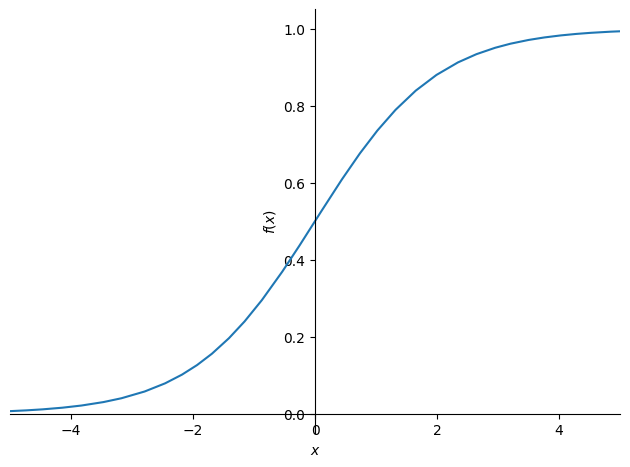

In [44]:
import sympy
sympy.plot("1/(1+exp(-x))", xlim=(-5,5));

In [49]:
def calc_preds(coeffs, indeps): return torch.sigmoid((indeps*coeffs).sum(axis=1))
# def calc_preds(coeffs, indeps): return torch.sigmoid((indeps @ coeffs)

val_indep@coeffs : Matrix multiplication

In [50]:
coeffs = train_model(lr=100)

0.532; 0.302; 0.231; 0.206; 0.201; 0.199; 0.198; 0.197; 0.197; 0.196; 0.196; 0.196; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 

In [51]:
acc(coeffs)

tensor(0.8258)

In [52]:
show_coeffs()

{'Sex_female': tensor(8.2268),
 'Sex_male': tensor(-9.9250),
 'Pclass_1': tensor(3.0804),
 'Pclass_2': tensor(1.9417),
 'Pclass_3': tensor(-6.6445),
 'Embarked_C': tensor(1.5732),
 'Embarked_Q': tensor(2.4211),
 'Embarked_S': tensor(-4.9530)}

In [53]:
# adding a new dimension
trn_dep = trn_dep[:, None]